In [250]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [251]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

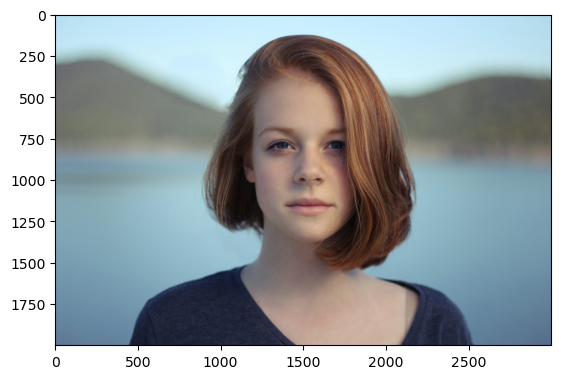

In [252]:
filename = "img.jpeg"
img = read_file(filename)

org_img = np.copy(img)

Create Edge Mask

In [253]:
def edge_mask(img, line_size, blur_value):
    """
    input: Gray Scale Image
    output: Edges of image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Ensure the input is converted to grayscale
    gray_blur = cv2.medianBlur(gray, blur_value)  # Apply median blur to reduce noise

    edges = cv2.adaptiveThreshold(
        gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value
    )

    return edges

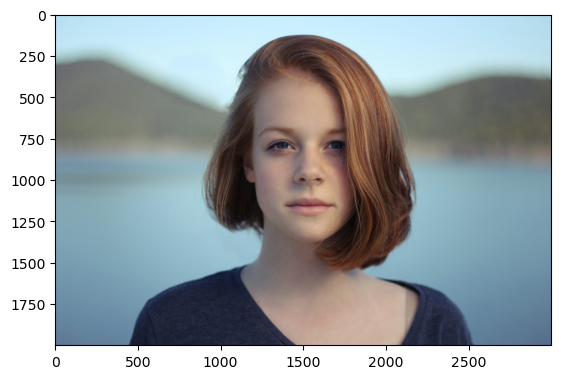

In [254]:
filename = "img.jpeg"
img = read_file(filename)  # Assign the returned image to a variable

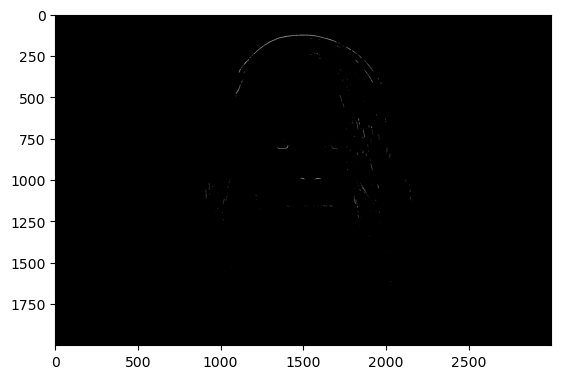

In [255]:
line_size, blur_value = 7, 9
edges = edge_mask(img, line_size, blur_value)

# plt.imshow(edges, cmap="gray")
plt.imshow(edges, cmap="binary")
plt.show()

Reduce the Color Palette

In [256]:
def color_quantization(img, k):

    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implimenting K-Means

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

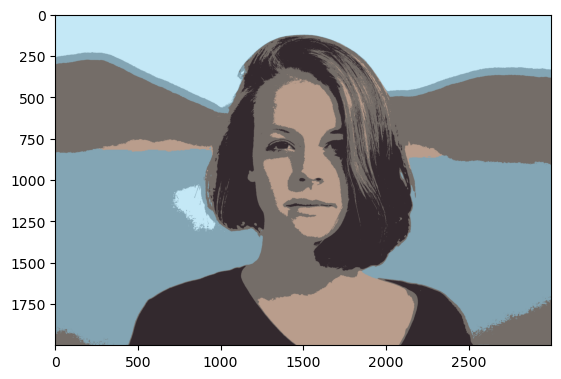

In [257]:
# Example usage
quantized_img = color_quantization(img, k=5)

# Display the quantized image
plt.imshow(quantized_img)
plt.show()

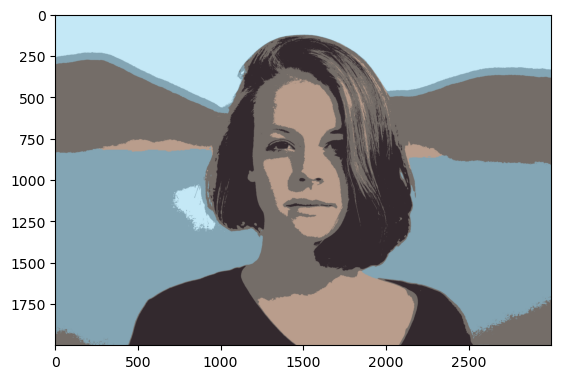

In [258]:
# Reduce the noise

blurred = cv2.bilateralFilter(quantized_img, d=3, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

Combine Edge Mask with the quantize img

In [259]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)

    plt.imshow(c)
    plt.title("cartoon image")
    plt.show()

    plt.imshow(org_img)
    plt.title("original image")
    plt.show()

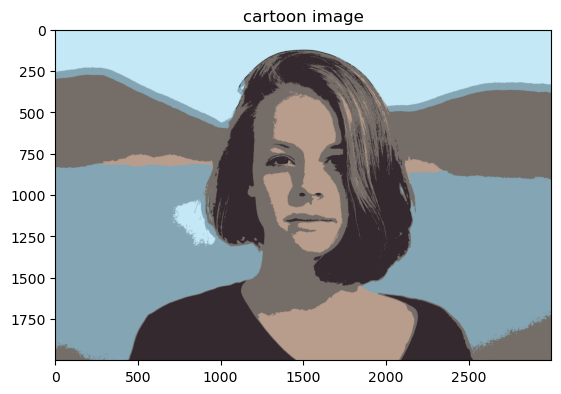

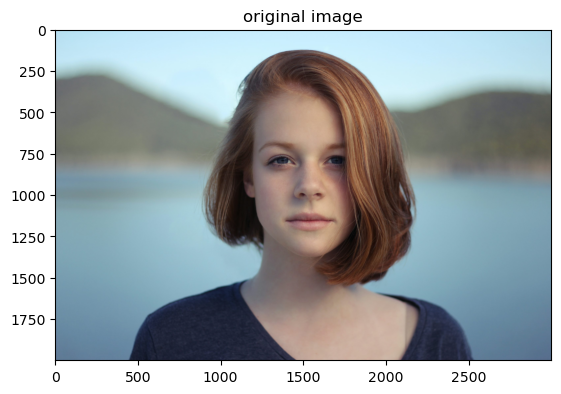

In [260]:
cartoon()